In [1]:
## Dependencies

# MatPlotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Standard
import numpy as np
import pandas as pd

# Datetime
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [3]:
# Create an engine to the SQLLite DB
engine = create_engine("sqlite:///hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()  # platform base engine
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [8]:
### Design a query to retrieve the last 12 months of precipitation data and plot the results. 

#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

## Perform a query to retrieve the date and precipitation scores
 # declares the variable
results = []

# defines the variable to query measurement date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp) # queries the data

# filter the query so data is great than our starting point of previous year.  Using chaining.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

# view the data
#print(results.all()) #

# # chain the .all() to get results in a list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results) 

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)

# View the DF
#print(df)

# View the DF without the index
#print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()

print(df.to_string(index=False))

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

 2017-08-23           0.45


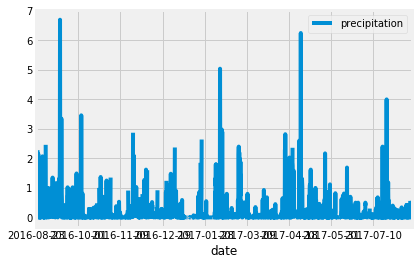

In [9]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation')

In [10]:
# Use Pandas to calculAte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()
# does not run without the all(). so you have to designate the set of values in the classes/table-rows.

[(9)]

In [12]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query((Measurement.station), func.count(Measurement.station)). \
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()). \
    all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

#session.query() basic form of session query
#session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281'). \
    all()


[(54.0, 85.0, 71.66378066378067)]

In [14]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#session.query(Measurement.tobs)  ## session query against Measurement -observedtemps

# filter  to single station
#results = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281')

# add filter for previous year - chaining
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281'). \
    filter(Measurement.date >= prev_year). \
    all()
# print(results)

df = pd.DataFrame(results, columns=['tobs'])
# print(df)

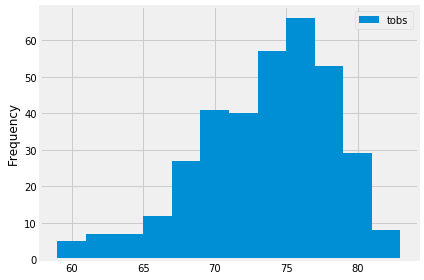

In [15]:
# and finally plot
df.plot.hist(bins=12)
plt.tight_layout()
# looks loke some temps are not represented lit 

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

#def calc_temps(start, end):
    # input start
    # input end

# Challenge

In [17]:
### Determine key statistical data about precipation data in the month of June.

# Set date variables for month of  June
start = dt.date(2017, 6, 1)
end = dt.date(2017, 6, 30)

# Create a results set from a session query of the Hawaii data for June
results = session.query(Measurement.date, Measurement.station, Measurement.prcp, Measurement.tobs). \
    filter(Measurement.date >= start).filter(Measurement.date <= end). \
    all()

# Save the query results as a Pandas DataFrame and set the index to the date column
june_df = pd.DataFrame(results, columns=['date', 'station','precipitation','temperature'])

june_df.set_index(june_df['date'], inplace=True)

# Sort the dataframe by date
june_df = june_df.sort_index()

# View the data
# print(june_df.to_string(index=False))
june_df.head()

,date,station,precipitation,temperature
date,,,,
2017-06-01,2017-06-01,USC00519397,0.00,79.0
2017-06-01,2017-06-01,USC00519523,0.00,79.0
2017-06-01,2017-06-01,USC00514830,0.00,81.0
2017-06-01,2017-06-01,USC00516128,0.01,74.0
2017-06-01,2017-06-01,USC00513117,0.03,76.0


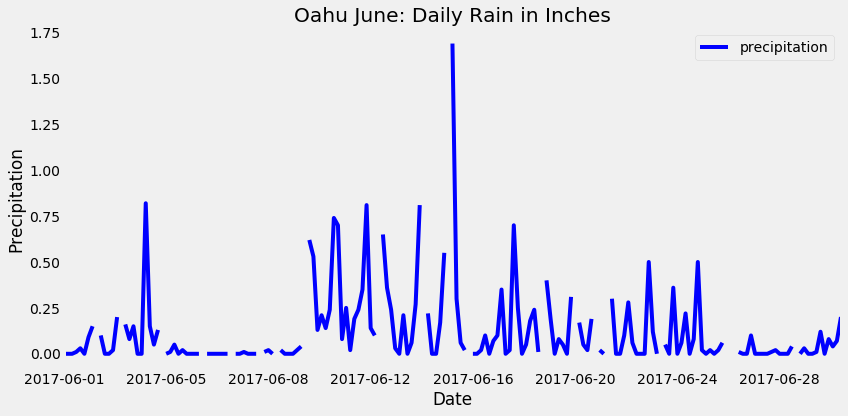

In [18]:
## Visual exploration of June Precipitation
plt.style.use('fivethirtyeight') # figure style 
june_df.plot(x='date', y='precipitation', color="blue", figsize=(12,6)) # does not seem terrible. one  or two heavy day. 
plt.xlabel("Date")
plt.ylabel ("Precipitation")
plt.title("Oahu June: Daily Rain in Inches")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Oahu_June_Daily_Rain_in_Inches.png")

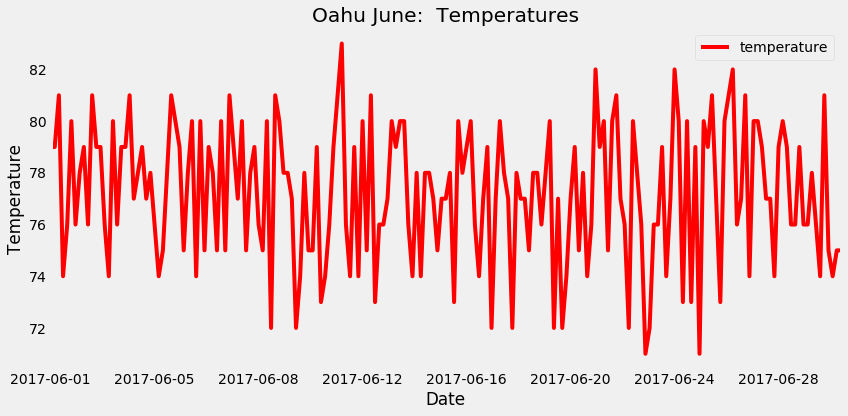

In [19]:
## Visual exploration of June Temperatures
plt.style.use('fivethirtyeight') # figure style
june_df.plot(x='date', y='temperature', color="red", figsize=(12,6)) # does not seem terrible. one  or two heavy day. 
plt.xlabel("Date")
plt.ylabel ("Temperature")
plt.title("Oahu June:  Temperatures")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Oahu_June_Temperatures.png") 

In [20]:
## And finally our statistics
june_df.describe()

,precipitation,temperature
count,171.000000,191.000000
mean,0.120000,77.219895
std,0.217726,2.622538
min,0.000000,71.000000
25%,0.000000,75.000000
50%,0.020000,77.000000
75%,0.150000,79.000000
max,1.690000,83.000000


In [21]:
### Determine key statistical data about precipation data in the month of November.

# Set date variables for month of November
start = dt.date(2016, 11, 1)
end = dt.date(2016, 11, 30)

# Create a results set from a session query of the Hawaii data for June
results = session.query(Measurement.date, Measurement.station, Measurement.prcp, Measurement.tobs). \
    filter(Measurement.date >= start).filter(Measurement.date <= end). \
    all()

# Save the query results as a Pandas DataFrame and set the index to the date column
november_df = pd.DataFrame(results, columns=['date', 'station','precipitation','temperature'])
november_df.set_index(november_df['date'], inplace=True)

# Sort the dataframe by date
november_df = november_df.sort_index()

# View the data
#print(june_df.to_string(index=False))
november_df.head()

,date,station,precipitation,temperature
date,,,,
2016-11-01,2016-11-01,USC00519397,0.00,77.0
2016-11-01,2016-11-01,USC00519523,0.01,79.0
2016-11-01,2016-11-01,USC00514830,0.00,77.0
2016-11-01,2016-11-01,USC00516128,0.09,73.0
2016-11-01,2016-11-01,USC00513117,0.01,77.0


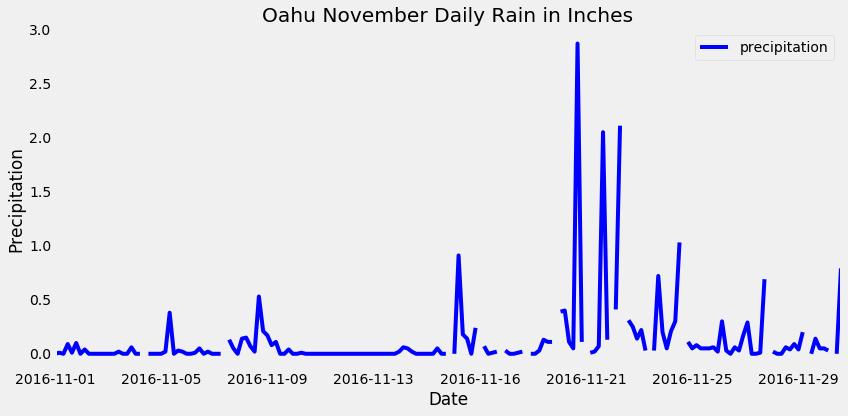

In [22]:
## Visual exploration of November Precipitation
plt.style.use('fivethirtyeight') # figure style 
november_df.plot(x='date', y='precipitation', color="blue", figsize=(12,6)) # does not seem terrible. one  or two heavy day. 
plt.xlabel("Date")
plt.ylabel ("Precipitation")
plt.title("Oahu November Daily Rain in Inches")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Oahu_November_Daily_Rain_in_Inches.png")

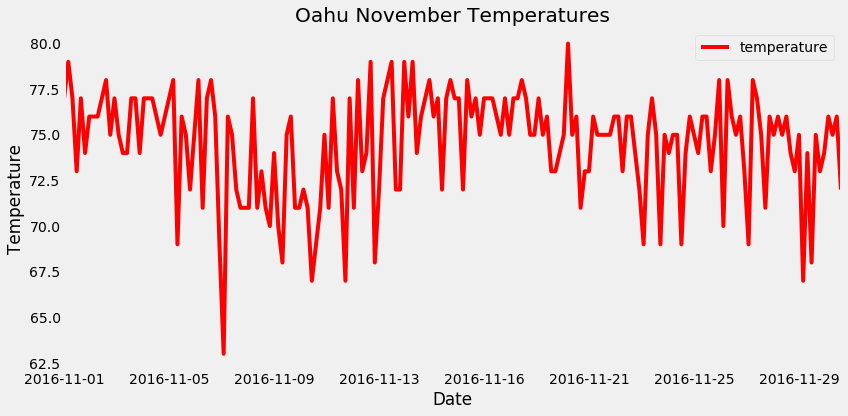

In [23]:
## Visual exploration of November Temperatures
november_df.plot(x='date', y='temperature', color="red", figsize=(12,6)) # does not seem terrible. one  or two heavy day. 
plt.xlabel("Date")
plt.ylabel ("Temperature")
plt.title("Oahu November Temperatures")
plt.grid()
plt.tight_layout()
plt.savefig("Images/Oahu_November_Temperatures.png")  # save pix

In [24]:
## Now some analysis of November weather. 
november_df.describe()

,precipitation,temperature
count,171.000000,186.000000
mean,0.120234,74.543011
std,0.342695,2.887209
min,0.000000,63.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.090000,77.000000
max,2.870000,80.000000


In [25]:
### Analysis of Weather Differences between June 2017 and November 2016 in Oahu, Hawaii.

## Analysis of Rain differences

# The average(mean) rain between June and November is about same, .12 inches. 
# Average daily run in June varies by a std of 0.2 inches while in November the std is 0.34 inches.
# This means that in June it is not uncommon to have days with twice the daily rain while in 
# .. November it is not uncommon to have three times the average daily rain. 
# So essentially the storms are stronger in Novemeber. 
 
# In both months, half the days have less than 0.02 inches of rain. 
#  75% of the days in June have less than a 0.15 inches while in November 75% of the days have less
# than 0.09 inches, which means that it rains more frequently in June, but the storms are stronger in November.

## Overall I would say in both months the rain is not a big factor on most days. 
# In June there are regular small rain storms while in November most das are dryer but the storms are more powerful.
# Potentially, during bad stormy days in November the rain could very well affect business.

## Analysis of Temparature Differences

# On average a day in June is 77 degrees while November is 74 degrees. 
# This is a very small difference between the two months. 
# The std comparisons indicate that the a normal variance for November is 2.8 degrees while its 
# 2.6 degress in June. This is also another small difference

# The differences in temperature between months are seen at the extremes. 
# November can be as cold as 63 degrees with a high of 80, while June low is only 71, with max of 83.
# So the temp in June varies within a range of 12 degress while 
# the November range is 17 degrees where the low of 63 is 11 degress below average.

# Overall, temperature in June and November tends to stay in the 70s with highs varying by six degress above average in both months, and the lows in November dipping by a greater margin than June, to 63 degrees.

# Both months produce comfortable weather ranging from 63 to 83 degrees with regular small amounts of rain.
# Sounds like paradise!


## Recommendations.

# Recommend  1 - drilling down into the data by Station and plotting the Stations on a map. Oahu
# is big island and there may be variances by Station that should be accounted for.

# Recommend 2 - Given the occasional relatively heavy storms in November, it would be good to define
# a threshold of how much rain per day is expected to impact business, then do some analysis based on 
# days that meet the threshold, using year long data.